<a href="https://colab.research.google.com/github/valentitos/Colabs-CC1002/blob/main/Clase_16_Mutacion/Clase16_Mutacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 16: Mutación y Aliasing

## Mutación

### Estructuras mutables

Como ya hemos experimentado, si intentamos modificar los atributos de una estructura, nos aparece el siguiente error:

In [1]:
import estructura
estructura.crear("Fraccion", "num den")
f = Fraccion(7,8)
f.den = 9

AttributeError: can't set attribute

Esto se debe a que las estructuras que hemos visto hasta ahora no pueden cambiar o modificarse. Sin embargo, hay situaciones en las que es necesario mutar/modificar valores dentro de una definición o estructura.

Sabemos que  estructura.py nos provee la definición:

In [2]:
# Persona: nombre(str) edad(int)
estructura.crear('Persona','nombre edad')

Nuestro querido modulo también provee la definición:

In [3]:
# PersonaMutable: nombre(str) edad(int)
estructura.mutable('PersonaMutable','nombre edad')

Esta ultima definición, permite cambiar los datos de una estructura a voluntad.

## Efectos de Mutación


 Para ejemplificar los efectos de la mutación, utilizaremos el siguiente diagrama:

![mapa_mem.png](mapa_mem.svg)

En la parte superior se ubican las variables, y en la parte inferior el contenido de esas variables. Mostraremos el efecto que se produce en la memoria del computador al realizar ciertas acciones.

![mapa_mem_mutacion2.png](mapa_mem_mutacion2.svg)

In [5]:
N = 8
L1 = lista(1, lista(2, listaVacia))

---

![mapa_mem_mutacion3.png](mapa_mem_mutacion3.svg)

In [7]:
N = 8
L1 = lista(1, lista(2, listaVacia))
L1 = agregarAlFinal(L1, 3)

Las estructuras tradicionales, al no ser mutables, simulábamos una edición, con una replica modificada de tal estructura

---

![mapa_mem_mutacion4.png](mapa_mem_mutacion4.svg)

In [8]:
P1 = Persona('vale',20)
P1.edad = 22

AttributeError: can't set attribute

Como las estructuras tradicionales no son mutables, no podemos editar sus atributos directamente

---

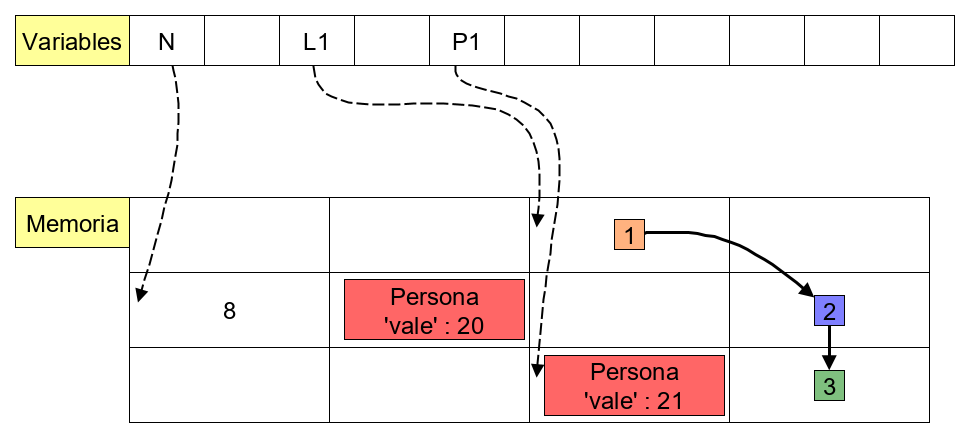


In [9]:
P1 = Persona('vale',20)
P1 = Persona(P1.nombre,21)

---

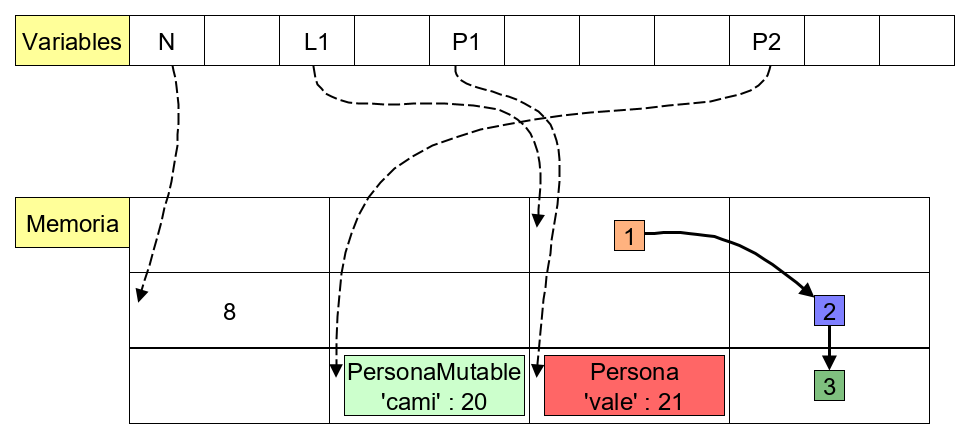


In [11]:
P2 = PersonaMutable('cami',20)

---

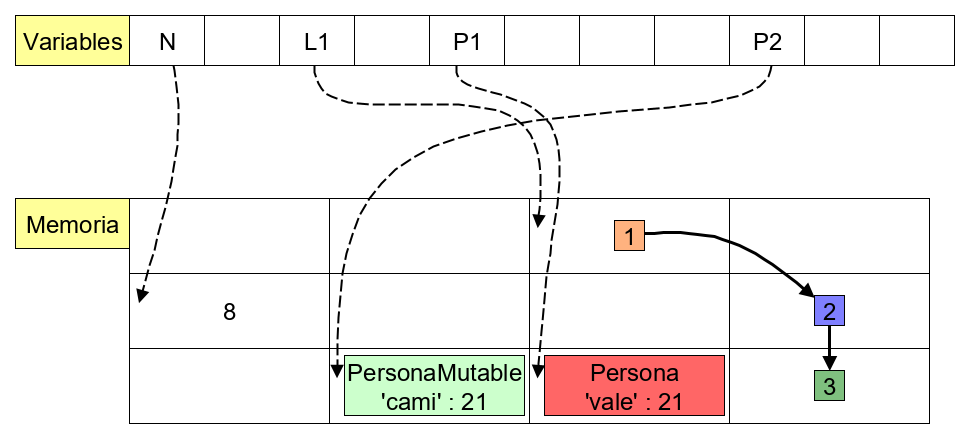


In [10]:
P2 = PersonaMutable('cami',20)
P2.edad = 21

En las estructuras mutables, podemos editar sus atributos a voluntad directamente en la memoria

---

## Aliasing

Veamos la siguente secuencia de comandos:

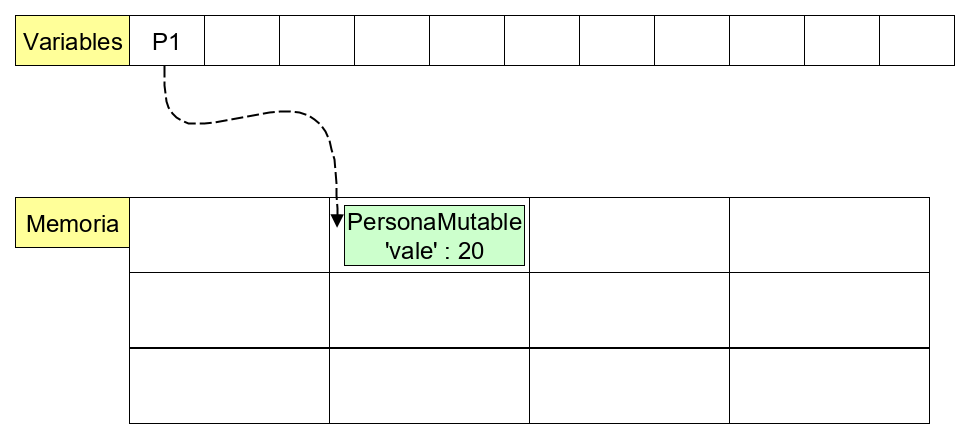

In [12]:
P1 = PersonaMutable('vale',20)

En las estructuras mutables, podemos editar sus atributos a voluntad directamente en la memoria

---

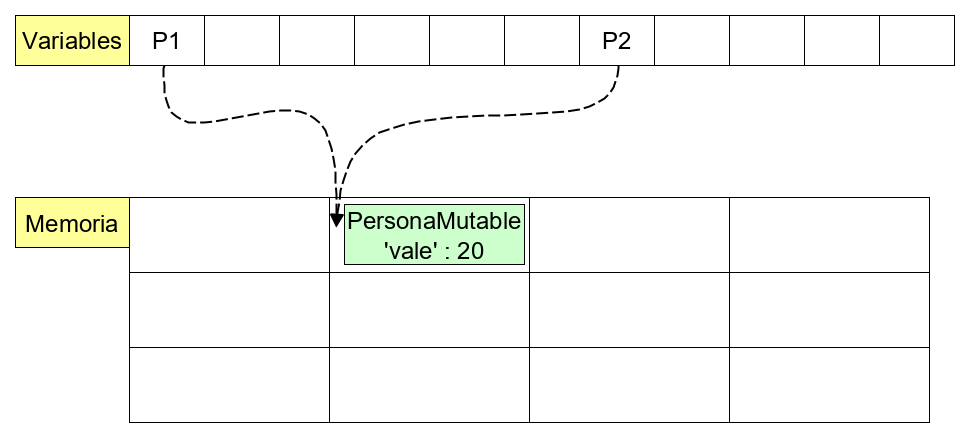

In [14]:
P1 = PersonaMutable('vale',20)
P2 = P1

Inocentemente, intentamos crear una segunda variable con el mismo contenido de otra

---

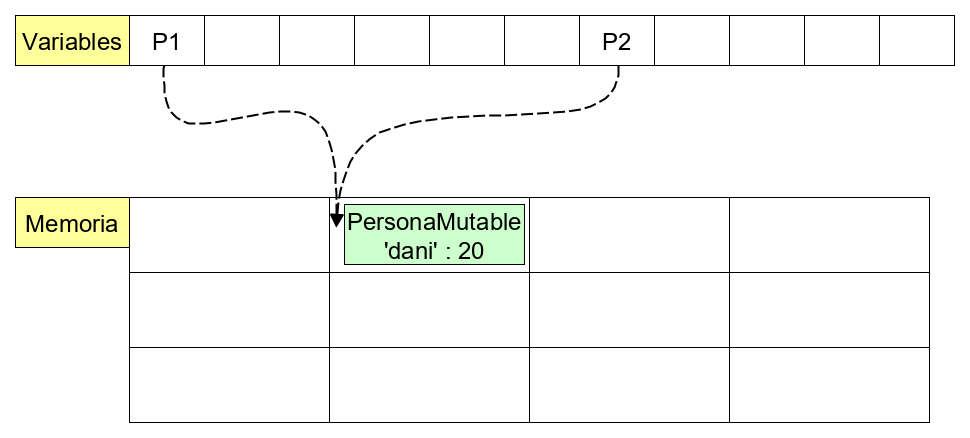


Luego, modificamos el contenido de la nueva variable


In [15]:
P1 = PersonaMutable('vale',20)
P2 = P1
P2.nombre = 'dani'

In [18]:
print(P2.nombre)

dani


In [19]:
print(P1.nombre)

dani


El problema, es que los cambios efectuados sobre `P2`, afectaron a `P1`, generando resultados inconsistentes

---

Lo que ocurre acá es que al ejecutar la instrucción `P2 = P1`, estamos indicando que `P2` es un **alias** de `P1`, es decir, otro nombre con el que nos referimos al mismo elemento en la memoria. Esto produce que:

- Los cambios realizados sobre `P2` hacen que `P1` cambie también.
- Los cambios realizados sobre `P1` hacen que `P2` cambie también.

Esto se conoce como **Aliasing**, y ocurre principalmente al trabajar con tipos de datos o estructuras compuestas, que tengan la propiedad de ser mutables. Esto es porque un dato compuesto es una estructura almacenada en memoria, y su variable asociada es solo una **referencia**

Una referencia es un identificador de donde se encuentra el dato en la memoria, para encontrarlo y acceder a el (como una flecha). Luego, al asignar una variable que contiene una referencia (como cuando hicimos `P2 = P1`), solo se hace una copia de la referencia y no del dato concreto en cuestión

Notar que esto solo ocurre con tipos de datos compuestos.

Al trabajar con tipos básicos (`int float bool str` etc.), estos se pasan por valor, lo que significa que el valor es copiado al guardarse en otra variable

---

![mem1](mapa_mem_alias_simple2.svg)

Por ejemplo, inicialmente, creamos una variable, y luego otra que tiene el mismo contenido que la primera

In [20]:
a = 8
b = a

Es esperable que ambas tengan el mismo contenido

In [21]:
print(a)

8


In [22]:
print(b)

8


---


![mem2](mapa_mem_alias_simple3.svg)

Como los tipos de dato simples se pasan por valor, al modificar una de las variables, no afecta el valor almacenado en la otra

In [23]:
a = 12

In [24]:
print(a)

12


In [25]:
print(b)

8


---

¿Como podemos crear una copia de `P2` independiente de `P1`?

Tenemos que realizar una **copia efectiva**, que consiste en crear una nueva instancia de la estructura (`P2`), usando los datos de `P1`.

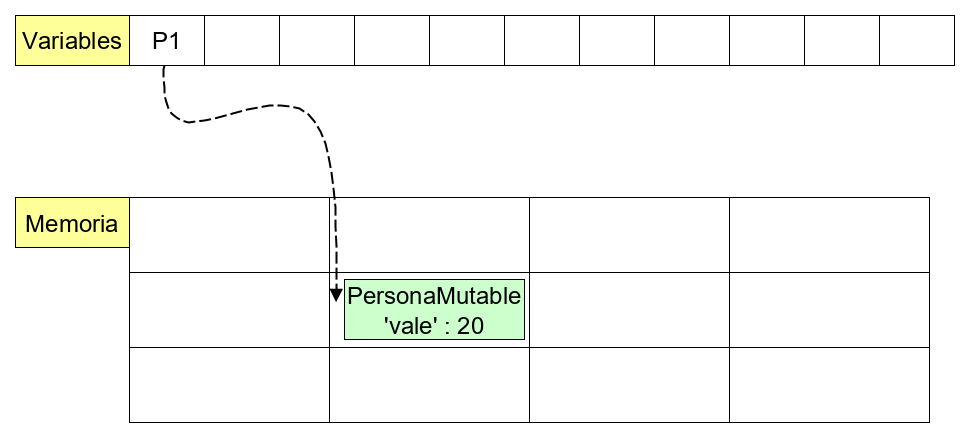


In [21]:
P1 = PersonaMutable('vale',20)

---

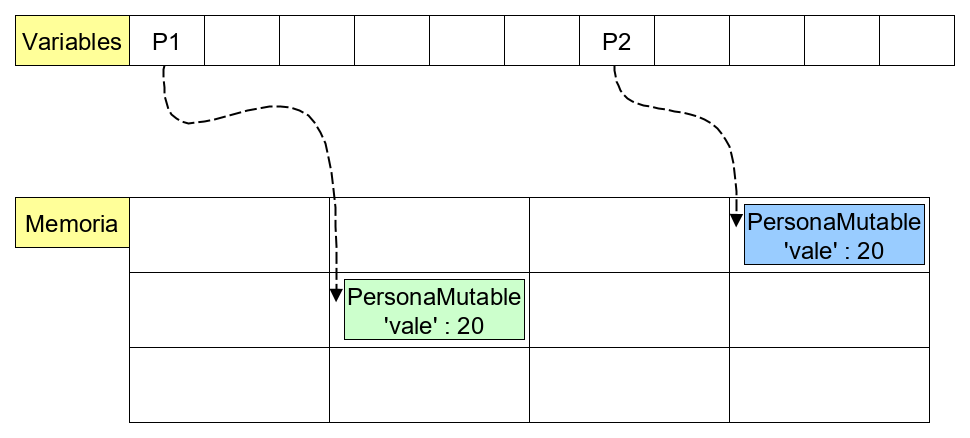


In [22]:
P1 = PersonaMutable('vale',20)
P2 = PersonaMutable(P1.nombre, P1.edad)


Creamos una nueva estructura, a partir de los datos de la primera, lo que se conoce como copia efectiva

---

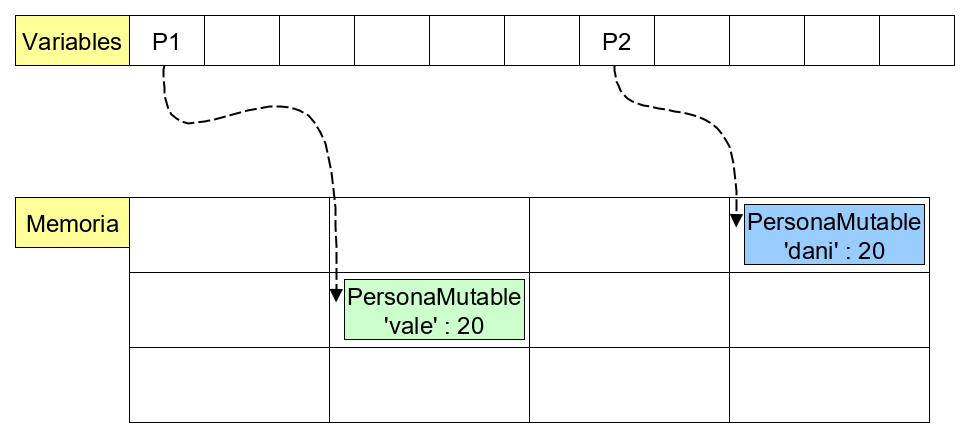


In [26]:
P1 = PersonaMutable('vale',20)
P2 = PersonaMutable(P1.nombre, P1.edad)
P2.nombre = 'dani'


In [27]:
print(P2.nombre)

dani


In [29]:
print(P1.nombre)

vale


Luego las modificaciones realizadas sobre una de las estructuras, no afectarán a la otra

---

## Variables de Estado

Hasta ahora, todas las funciones que hemos implementado, reciben valores y entregan un resultado en función de estos valores. En general, esto facilita bastante la programación, ya que es esperable que para los mismos parámetros, la función entregue el mismo resultado

Sin embargo, hay contextos en los que se requiere que las funciones/programas tengan **memoria** sobre que acciones se han realizado sobre los datos

Que una función disponga de memoria es útil para:

- Administrar información de manera centralizada

- La función sepa cual es el último estado vigente de la información

Pero, también agrega ciertas complejidades:

- Dificulta el testing (ya que depende del estado actual de la información)

- Si una función cambia la memoria, puede tener impacto en otras funciones que usan la misma memoria en otras partes del programa

Para implementar una función con memoria, usaremos **variables de estado**. Una variable de estado es una variable, que almacena (recuerda) valores entre distintas llamadas a una función

En Python, una variable de estado se implementa como una variable **global** (usando la palabra clave `global`)

Una variable global:

- Se puede acceder desde cualquier función y el programa principal

- Su valor puede ser actualizado/editado (mutar)

### Alcance de Variables (global)

Hasta ahora, conocíamos la definición de variables locales dentro de una función. Es decir, cuando una función termina de ejecutarse, todos sus parámetros y variables utilizadas dentro de ella desaparecen.

Ahora, tenemos que tener en cuenta que las variables de estado, tienen un alcance global. Es decir, cuando una función termina de ejecutarse, las variables de estado que hayan sido modificadas dentro de la función, persisten en la memoria. Y al invocar nuevamente a la función, está tendrá acceso a esta variable de estado previamente modificada


In [1]:
# variable de estado
# Creamos una variable de estado, fuera de las funciones que la utilizarán
contador = 4

# incrementar: None -> None
# efecto: modifica la variable de estado contador, 
#   incrementando su valor en 1
def incrementar():
    # Indicamos que está función usará (y modificará) 
    # una variable global definida fuera de la función
    global contador

    # Incrementamos en 1 el valor almacenado en la variable global
    contador = contador + 1

    return None

# mostrar: None -> None
# efecto: muestra en pantalla el valor actual
#  almacenado en la variable de estado contador
def mostrar():

    # Indicamos que está función usará
    # una variable global definida fuera de la función
    global contador

    # mostramos en pantalla el valor actual almacenado en la variable global
    print(contador)

    return None

Inicialmente, mostramos el valor almacenado

In [2]:
mostrar()

4


Luego si invocamos a incrementar, vemos que afecta el valor almacenado en la variable global

In [3]:
incrementar()
mostrar()

5


Como la función tiene memoria, si invocamos varias veces a incrementar, va a ir actualizando el valor guardado (en vez de empezar del valor inicial)

In [4]:
incrementar()
incrementar()
incrementar()
mostrar()

8


### Testing con variables globales

Ahora… ¿como testeamos una función que puede modificar una (o varias) variables de estado? Tenemos que:

- Definir un estado conocido para las variables de estado

- Ir invocando a las funciones, y comprobar que, dado un estado previo, las funciones modifican la variable de estado en la forma esperada



In [6]:
# Testing
# Establecemos un estado conocido para la variable de estado
contador = 7

# Test incrementar
# Incrementar, como edita el valor conocido de la variable contador (sumándole 1), entonces esperamos ver reflejado este cambio
incrementar()
assert contador == 8

# Test mostrar
# Mostrar, como solo muestra cosas en pantalla, no debiese afectar el estado actual de la variable contador
mostrar()
assert contador == 8

8


## Conclusiones

Ahora que es posible mutar estructuras o el contenido de las variables que creemos, tenemos que tener cuidado al operar con ellas.

Dado que si creamos funciones que realizan cambios sobre nuestras variables, puede que realicemos modificaciones de forma permanente, las cuales no queríamos realizar.

Por lo que al crear funciones, tenemos que tener en consideración, si queremos:

- Modificar los parámetros entregados

- Entregar una copia con las modificaciones adecuadas

*Spoilers*: Algunas operaciones de las listas de Python son mutables, es decir, modifican directamente la lista entregada como parámetro (en vez de entregar una copia con el resultado).

## Fin Unidad 2

En esta unidad vimos:

- Estructuras

- Estructuras Recursiva Lista 

- Abstracción Funcional sobre Listas

- Estructura Recursiva Árbol

- Estructuras Mutables

Todo esto se dará como conocido para la Unidad 3
